In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
from alpha_vantage.timeseries import TimeSeries
from pprint import pprint
import requests
key='8NBLCOTKI465W93V'
secKey = "d76154d8c11c709dbdaaa8cdf25c2b69424847ba85f2a569742d588d0d53c8b0"

In [6]:
maxRetry = 3

In [7]:
def getStockData(csym, isFull=False, interval="DAILY"):
    retry = 0
    output = None
    while(retry < maxRetry):
        try:
            if isFull:
                url = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol="+csym+"&outputsize=full&apikey=8NBLCOTKI465W93V"
            else:
                url = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol="+csym+"&apikey=8NBLCOTKI465W93V"
            r = requests.get(url)
            output = r.json()
            if output and "Time Series (Daily)" not in output:
                output = None
                time.sleep(10)
                continue
            #print(output)
            break
        except Exception as e:
            print(e)
            retry = retry + 1
            time.sleep(5)
    if not output:
        return None
    return output

In [111]:
def getTYData(interval, maturity):
    retry = 0
    output = None
    while(retry < maxRetry):
        try:
            url = "https://www.alphavantage.co/query?function=TREASURY_YIELD&interval="+interval+"&maturity="+maturity+"&apikey=8NBLCOTKI465W93V"
            r = requests.get(url)
            output = r.json()
            #print(output)
            break
        except Exception as e:
            print(e)
            retry = retry + 1
            time.sleep(5)
    if not output:
        return None
    return output

In [117]:
ty10Data = getTYData("daily", "10year")
print(ty10Data)

{'name': '10-Year Treasury Constant Maturity Rate', 'interval': 'daily', 'unit': 'percent', 'data': [{'date': '2023-02-09', 'value': '3.67'}, {'date': '2023-02-08', 'value': '3.63'}, {'date': '2023-02-07', 'value': '3.67'}, {'date': '2023-02-06', 'value': '3.63'}, {'date': '2023-02-03', 'value': '3.53'}, {'date': '2023-02-02', 'value': '3.40'}, {'date': '2023-02-01', 'value': '3.39'}, {'date': '2023-01-31', 'value': '3.52'}, {'date': '2023-01-30', 'value': '3.55'}, {'date': '2023-01-27', 'value': '3.52'}, {'date': '2023-01-26', 'value': '3.49'}, {'date': '2023-01-25', 'value': '3.46'}, {'date': '2023-01-24', 'value': '3.46'}, {'date': '2023-01-23', 'value': '3.52'}, {'date': '2023-01-20', 'value': '3.48'}, {'date': '2023-01-19', 'value': '3.39'}, {'date': '2023-01-18', 'value': '3.37'}, {'date': '2023-01-17', 'value': '3.53'}, {'date': '2023-01-16', 'value': '.'}, {'date': '2023-01-13', 'value': '3.49'}, {'date': '2023-01-12', 'value': '3.43'}, {'date': '2023-01-11', 'value': '3.54'}, 

In [118]:
ty2Data = getTYData("daily", "2year")
print(ty2Data)

{'name': '2-Year Treasury Constant Maturity Rate', 'interval': 'daily', 'unit': 'percent', 'data': [{'date': '2023-02-09', 'value': '4.48'}, {'date': '2023-02-08', 'value': '4.45'}, {'date': '2023-02-07', 'value': '4.47'}, {'date': '2023-02-06', 'value': '4.44'}, {'date': '2023-02-03', 'value': '4.30'}, {'date': '2023-02-02', 'value': '4.09'}, {'date': '2023-02-01', 'value': '4.09'}, {'date': '2023-01-31', 'value': '4.21'}, {'date': '2023-01-30', 'value': '4.25'}, {'date': '2023-01-27', 'value': '4.19'}, {'date': '2023-01-26', 'value': '4.17'}, {'date': '2023-01-25', 'value': '4.11'}, {'date': '2023-01-24', 'value': '4.12'}, {'date': '2023-01-23', 'value': '4.21'}, {'date': '2023-01-20', 'value': '4.14'}, {'date': '2023-01-19', 'value': '4.09'}, {'date': '2023-01-18', 'value': '4.06'}, {'date': '2023-01-17', 'value': '4.18'}, {'date': '2023-01-16', 'value': '.'}, {'date': '2023-01-13', 'value': '4.22'}, {'date': '2023-01-12', 'value': '4.12'}, {'date': '2023-01-11', 'value': '4.20'}, {

In [8]:
sData = getStockData("APPN", True)
print(sData)

{'Meta Data': {'1. Information': 'Daily Time Series with Splits and Dividend Events', '2. Symbol': 'APPN', '3. Last Refreshed': '2023-02-10', '4. Output Size': 'Full size', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2023-02-10': {'1. open': '41.01', '2. high': '41.98', '3. low': '40.4', '4. close': '40.64', '5. adjusted close': '40.64', '6. volume': '395335', '7. dividend amount': '0.0000', '8. split coefficient': '1.0'}, '2023-02-09': {'1. open': '43.53', '2. high': '44.245', '3. low': '41.6', '4. close': '41.64', '5. adjusted close': '41.64', '6. volume': '373187', '7. dividend amount': '0.0000', '8. split coefficient': '1.0'}, '2023-02-08': {'1. open': '43.6', '2. high': '44.41', '3. low': '42.73', '4. close': '42.79', '5. adjusted close': '42.79', '6. volume': '298804', '7. dividend amount': '0.0000', '8. split coefficient': '1.0'}, '2023-02-07': {'1. open': '42.61', '2. high': '43.62', '3. low': '41.56', '4. close': '43.42', '5. adjusted close': '43.42', '6. volume': 

In [97]:
df = pd.DataFrame(sData["Time Series (Daily)"])
df = df.T
#print(df.columns)
#df = df.drop("1. open")
#df = df[["5. adjusted close"]].copy()
df = pd.DataFrame().assign(StockClose=df["5. adjusted close"])
df[df.columns[0]] = df[df.columns[0]].astype(float)
df = df.sort_index()
df

,StockClose
2017-05-25,15.010
2017-05-26,17.110
2017-05-30,17.900
2017-05-31,17.650
2017-06-01,17.945
...,...
2023-02-06,42.690
2023-02-07,43.420
2023-02-08,42.790
2023-02-09,41.640


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1439 entries, 2017-05-25 to 2023-02-10
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StockClose  1439 non-null   float64
dtypes: float64(1)
memory usage: 22.5+ KB


<AxesSubplot:>

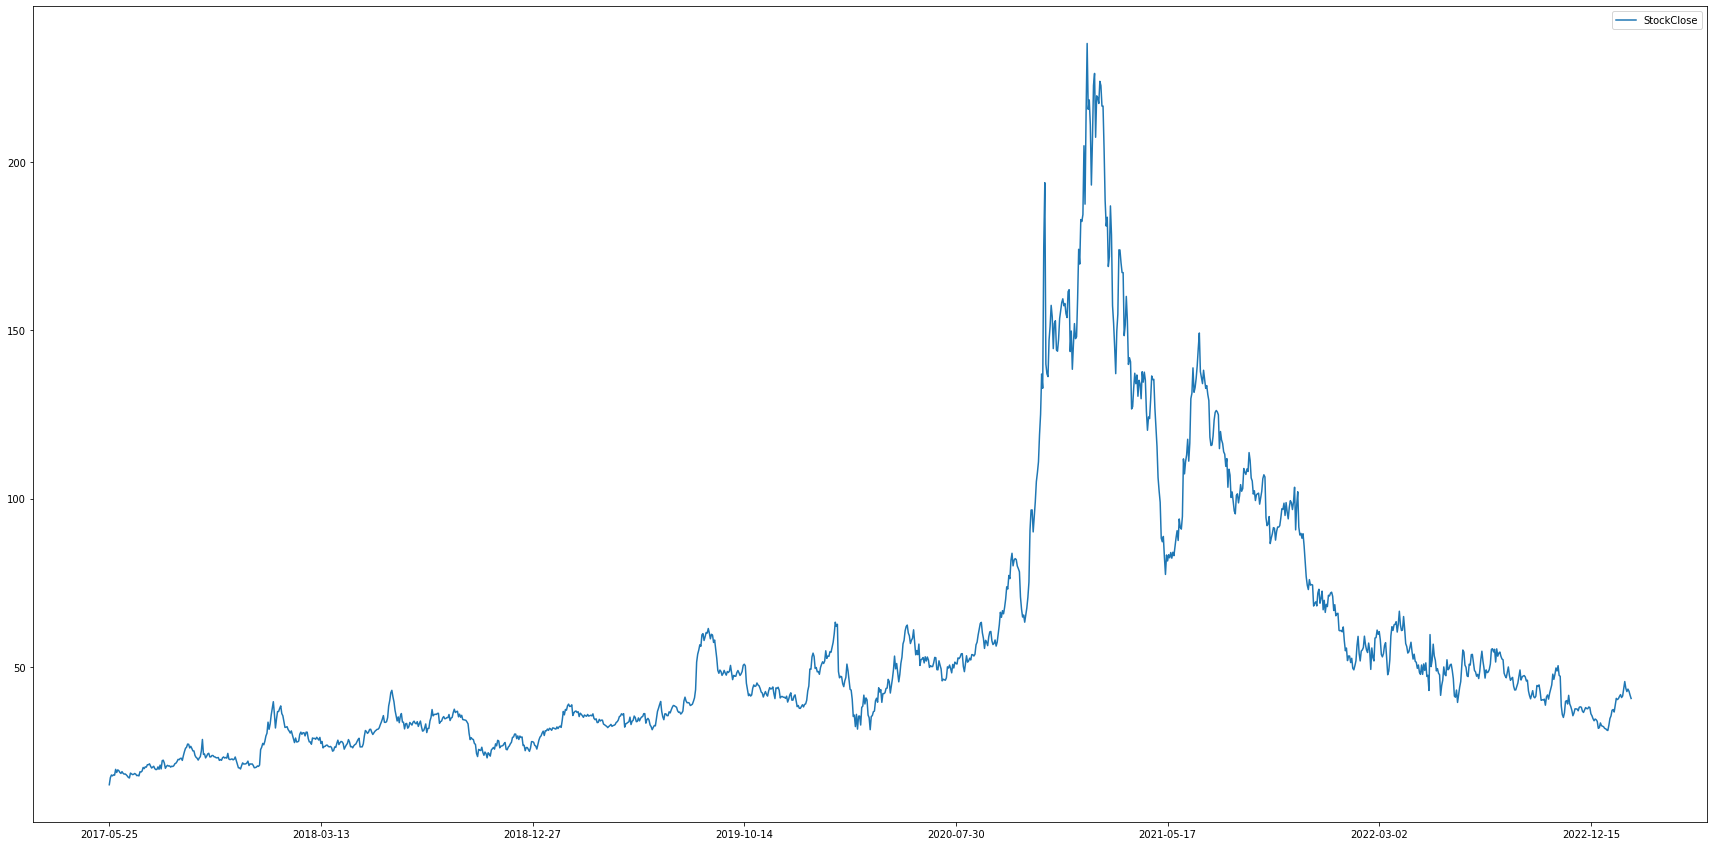

In [99]:
df.plot(figsize=(30,15))

In [110]:
names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday']
df.index = pd.to_datetime(df.index)
#df.index.weekday

for i, x in enumerate(names):
    df[x] = (df.index.get_level_values(0).weekday == i).astype(int)
df["Close"] = df["StockClose"]
df = df.drop("StockClose", axis=1)
df

,Monday,Tuesday,Wednesday,Thursday,Close
2017-05-25,0,0,0,1,15.010
2017-05-26,0,0,0,0,17.110
2017-05-30,0,1,0,0,17.900
2017-05-31,0,0,1,0,17.650
2017-06-01,0,0,0,1,17.945
...,...,...,...,...,...
2023-02-06,1,0,0,0,42.690
2023-02-07,0,1,0,0,43.420
2023-02-08,0,0,1,0,42.790
2023-02-09,0,0,0,1,41.640


In [141]:
ty10f = pd.DataFrame(ty10Data["data"])
ty10f = ty10f.set_index("date")
ty10f.index.names = [""]
ty10f = ty10f[ty10f.value != "."]
ty10f[ty10f.columns[0]] = ty10f[ty10f.columns[0]].astype(float)
ty10f = ty10f.rename({'value': 'TY10YR'}, axis=1)
ty10f = ty10f.sort_index()
ty10f

,TY10YR
,
1962-01-02,4.06
1962-01-03,4.03
1962-01-04,3.99
1962-01-05,4.02
1962-01-08,4.03
...,...
2023-02-03,3.53
2023-02-06,3.63
2023-02-07,3.67


In [152]:
ty2f = pd.DataFrame(ty2Data["data"])
ty2f = ty2f.set_index("date")
ty2f.index.names = [""]
ty2f = ty2f[ty2f.value != "."]
ty2f[ty2f.columns[0]] = ty2f[ty2f.columns[0]].astype(float)
ty2f = ty2f.rename({'value': 'TY2YR'}, axis=1)
ty2f = ty2f.sort_index()
ty2f

,TY2YR
,
1976-06-01,7.26
1976-06-02,7.23
1976-06-03,7.22
1976-06-04,7.12
1976-06-07,7.09
...,...
2023-02-03,4.30
2023-02-06,4.44
2023-02-07,4.47


In [157]:
ndf = pd.merge(ty10f, df, left_index=True, right_index=True, how='outer')
#ndf = pd.merge(ty2f, ndf, left_index=True, right_index=True, how='outer')
ndf = ndf[ndf['Close'].notna()]
ndf = ndf[ndf['TY10YR'].notna()]
#ndf = ndf[ndf['TY2YR'].notna()]
ndf

,TY10YR,Monday,Tuesday,Wednesday,Thursday,Close
2017-05-25,2.25,0.0,0.0,0.0,1.0,15.010
2017-05-26,2.25,0.0,0.0,0.0,0.0,17.110
2017-05-30,2.21,0.0,1.0,0.0,0.0,17.900
2017-05-31,2.21,0.0,0.0,1.0,0.0,17.650
2017-06-01,2.21,0.0,0.0,0.0,1.0,17.945
...,...,...,...,...,...,...
2023-02-03,3.53,0.0,0.0,0.0,0.0,43.690
2023-02-06,3.63,1.0,0.0,0.0,0.0,42.690
2023-02-07,3.67,0.0,1.0,0.0,0.0,43.420
2023-02-08,3.63,0.0,0.0,1.0,0.0,42.790


In [158]:
ndf.corr()

,TY10YR,Monday,Tuesday,Wednesday,Thursday,Close
TY10YR,1.000000,-0.010463,0.001586,0.002984,0.001071,-0.497576
Monday,-0.010463,1.000000,-0.240957,-0.239927,-0.238896,-0.001942
Tuesday,0.001586,-0.240957,1.000000,-0.259487,-0.258372,0.003777
Wednesday,0.002984,-0.239927,-0.259487,1.000000,-0.257267,0.003190
Thursday,0.001071,-0.238896,-0.258372,-0.257267,1.000000,0.000553
Close,-0.497576,-0.001942,0.003777,0.003190,0.000553,1.000000


In [159]:
X = ndf.drop(['Close'], axis=1)
y = ndf['Close']

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [161]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [162]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [164]:
y_pred = model.predict(X_test)
y_pred

array([67.73164511, 41.53001889, 63.48368532, 34.73900972, 71.09362452,
       37.60084354, 52.79713292, 57.72118819, 50.55079324, 26.22131828,
       91.28755093, 38.62935558, 31.61521847, 55.14082361, 15.06492096,
       39.60899506, 44.96406577, 49.64975264, 66.61600538, 88.25941618,
       73.30131496, 48.55770194, 33.59306932, 43.64888712, 80.91125416,
       20.44358069, 41.08376299, 16.76281684, 70.6237796 , 40.28690771,
       54.55856747, 10.86431945, 64.16159797, 70.40918047, 80.66453719,
       66.20005015, 53.1326721 , 53.21979979, 40.28690771, 51.57077647,
       70.63230842, 76.22556729, 82.93464613, 86.28156533, 47.42700199,
       59.92216699, 91.28755093, 69.50813987, 82.90434547, 53.44292773,
       57.14897513, 68.97475629, 70.40065166, 48.78082988, 85.82006898,
       25.3373353 , 89.94878325, 43.63382691, 55.89733514, 70.98290781,
       66.63106559, 76.11485057, 52.6864162 , 67.53881783, 34.72376926,
       41.17089068, 35.82434878, 45.18719372, 84.01145639, 38.29

In [165]:
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred))) 

RMSE:  35.03657615603978


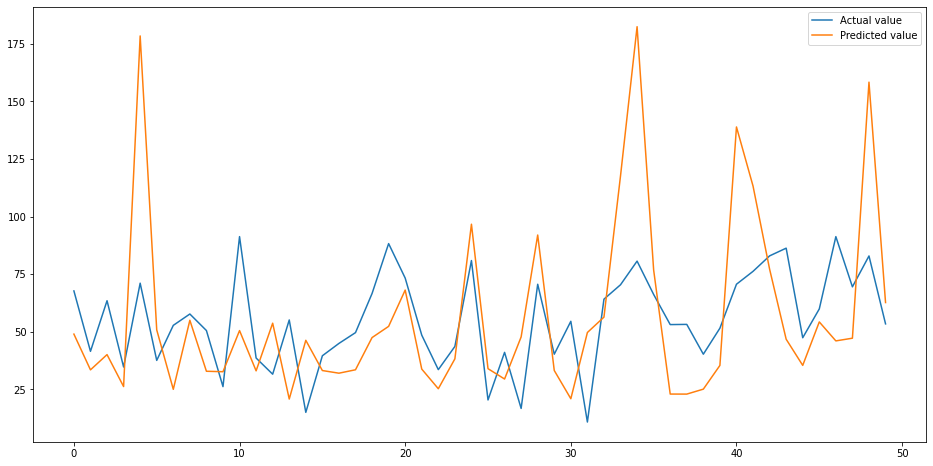

In [166]:
test = pd.DataFrame({'Predicted value':y_pred, 'Actual value':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual value','Predicted value'])